In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
imagem.dtype

NameError: name 'imagem' is not defined

In [3]:
imagem

NameError: name 'imagem' is not defined

### 1. Abrindo Imagem

60.bmp<br>
82.bmp<br>
114.bmp<br>
150.bmp<br>
205.bmp

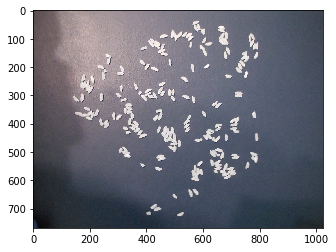

In [4]:
imagem = cv2.imread("205.bmp")
plt.imshow(imagem)

### 2. Convertendo para escala de cinza

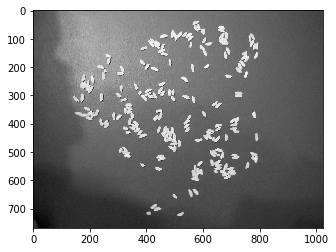

In [5]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem_cinza, cmap='gray') #As cores ficam zoadas no Jupyter se deixar sem esse parâmetro

In [6]:
imagem = imagem_cinza

### 3. Filtro da Mediana

Homogeneizar as texturas

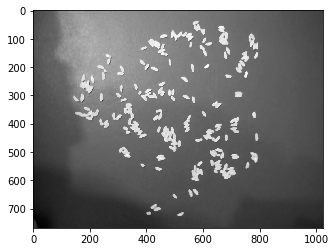

In [7]:
tamanho_janela = 5
mediana = cv2.medianBlur(imagem, tamanho_janela)
plt.imshow(mediana, cmap='gray')

In [8]:
imagem = mediana

### Gradiente

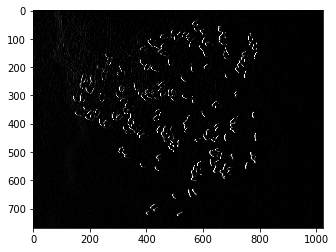

In [9]:
gradiente = cv2.Sobel(imagem, cv2.CV_8U, 1, 0, ksize=3)
plt.imshow(gradiente, cmap='gray') #As cores ficam zoadas no Jupyter se deixar sem esse parâmetro

# Teste

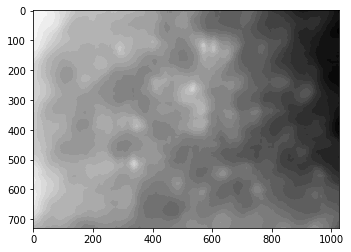

In [30]:
tamanho_janela = 61
iluminacao = cv2.medianBlur(imagem, tamanho_janela)
plt.imshow(iluminacao, cmap='gray') #As cores ficam zoadas no Jupyter se deixar sem esse parâmetro

In [ ]:
imagem = sem_iluminacao

### Normalização local

Reduzir problemas de iluminação na imagem

In [ ]:
tamanho_janela = 200
kernel = np.ones((tamanho_janela, tamanho_janela),np.uint8)
minimo = cv2.erode(imagem, kernel)
maximo = cv2.dilate(imagem, kernel)

imagem_normalizada_local = (imagem - minimo) / (maximo - minimo)

plt.imshow(imagem_normalizada_local, cmap='gray')

In [ ]:
#imagem = np.uint8(imagem_normalizada_local * 255.0)

### Normalização global

In [ ]:
normalizada = imagem
normalizada = cv2.normalize(normalizada, normalizada, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalizada, cmap='gray') #As cores ficam zoadas no Jupyter se deixar sem esse parâmetro

In [ ]:
imagem = np.uint8(normalizada * 255.0)

### Limiarização global

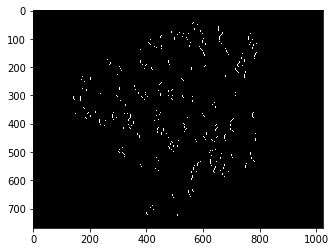

In [11]:
ret,imagem_limiarizacao_global = cv2.threshold(gradiente, 175, 255, cv2.THRESH_BINARY)
plt.imshow(imagem_limiarizacao_global, cmap='gray')

In [ ]:
imagem = imagem_limiarizacao_global

### Limiarização local

In [ ]:
tamanho_janela = 51
imagem_limiarizacao = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, tamanho_janela, 2)
plt.imshow(imagem_limiarizacao, cmap='gray')

### Para salvar o arquivo localmente

In [ ]:
cv2.imwrite("./debug.png", imagem)

In [ ]:
plt.imshow(imagem_limiarizacao_global * imagem_limiarizacao, cmap='gray')